## Pendahuluan

Ranking universitas terkadang menjadi pembahasan yang menarik dikalangan Mahasiswa maupun Siswa SMA yang ingin melanjutkan ke perguruan tinggi. Ranking Universitas kadang dijadikan alasan dalam pengambilan keputusan bagi seorang Mahasiswa/Siswa untuk melanjutkan studi ke jenjang berikutnya. 

Banyak versi perankingan yang ada di Internet, 2 diantaranya adalah dari Times Higher Education (THE) dan QS World Ranking. Tentunya 2 penyedia tersebut mempunyai alasan tersendiri dalam menentukan ranking universitas.

Pada kali ini, kami mencoba untuk menggabungkan skor dari 2 penyedia ranking universitas tersebut dengan metode yang akan dijelaskan di bawah. Tujuan dari proyek ini adalah sebagai berikut :


*   Membuat Skor Rata-rata dari 2 penyedia ranking dan membuat ranking baru dari hasil Skor tersebut
*   Melihat Top Universities di Dunia, Asia, dan Indonesia
* Melihat Skor rata-rata setiap negara atau benua
* Melihat komponen penilaian terpenting yang menentukan ranking dari universitas tersebut

Berikut adalah langkah atau metode yang dilakukan untuk mencapai tujuan tersebut :
1. Melakukan Scrapping di web Times Higher Education dan QS World Ranking 
2. Meload Data
3. Melakukan Transformasi Data
4. Melakukan Exploratory Data Analysis


*) Script ini hanya berisikan poin 2 sampai 4
Untuk melihat script point 1 silahkan klik tautan berikut : 
https://drive.google.com/file/d/1N9cYLxEzL3luW4pDf8ChOJAK1BMd_xnB/view?usp=sharing  


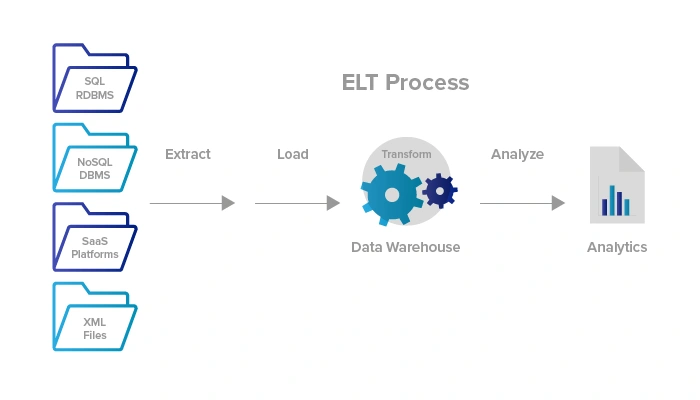

## Import Library dan Mendapatkan Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pycountry-convert
import pycountry_convert as pc

In [2]:
#Get Data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1N9cYLxEzL3luW4pDf8ChOJAK1BMd_xnB' -O dataset.zip

--2021-11-29 03:00:16--  https://docs.google.com/uc?export=download&id=1N9cYLxEzL3luW4pDf8ChOJAK1BMd_xnB
Resolving docs.google.com (docs.google.com)... 172.217.204.101, 172.217.204.138, 172.217.204.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fk6n39e42dp95gpbn3jh061gbf4uott0/1638154800000/17539190491766931577/*/1N9cYLxEzL3luW4pDf8ChOJAK1BMd_xnB?e=download [following]
--2021-11-29 03:00:17--  https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fk6n39e42dp95gpbn3jh061gbf4uott0/1638154800000/17539190491766931577/*/1N9cYLxEzL3luW4pDf8ChOJAK1BMd_xnB?e=download
Resolving doc-0g-b4-docs.googleusercontent.com (doc-0g-b4-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-0g-b4-docs.googleusercontent.com (doc-0g

In [3]:
#Extract Data
import zipfile

#Lokasi file zip
file_path = '/kaggle/working/dataset.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

In [4]:
data_path = "/content/dataset/"

In [5]:
df_THE = pd.read_csv(data_path+"THE.csv")
df_qsworld = pd.read_csv(data_path+"qsworld.csv")

## Transformasi Data dari Times Higher Education

:Pada dataset ini kita akan melakukan beberapa tahapan transformasi :

1. Mengubah nama kolom : kolom Name menjadi University, Country menjadi Country_THE agar mempermudah dalam proses join
2. Memfilter kolom : Kolom yang digunakan semuanya kecuali beberapa kolom yaitu Unnamed: 0, Overall, dan Rank. Kolom tersebut dihapus karena tidak diperlukan, untuk Overall nanti akan dibuatkan Average_Score pada akhir proses, untuk Rank nanti akan dibuatkan ranking baru setelah digabungkan
3. Mereplace beberapa value agar sinkron : Contohnya seperti Universitas École Polytechnique Fédérale de Lausanne	pada dataset lainnya dinamakan EPFL maka agar bisa dijadikan primary key, kita harus menyingkronisasikan nama tersebut.
4. Melakukan sinkronisasi nama universitas : Terdapat universitas yang pada kata akhirnya singkatan, misalnya "Bandung Institute of Technology (ITB)" kita akan menghapus kata "(ITB)"
5. Mengecek apakah ada missing value, jika ada dan memungkinkan kita akan menghapus baris yang mengandung nilai tersebut


In [6]:
#Mengubah Nama Kolom
df_THE = df_THE.rename({'Name': 'University','Country' : 'Country_THE'}, axis=1)

In [7]:
#Tampilkan Data
df_THE

,Unnamed: 0,Rank,University,Overall,Teaching,Research,Citations,Industry Income,International Outlook,Country_THE
0,0,1,University of Oxford,95.6,91.3,99.6,98.0,68.7,96.4,United Kingdom
1,1,2,Stanford University,94.9,92.2,96.7,99.9,90.1,79.5,United States
2,2,3,Harvard University,94.8,94.4,98.8,99.4,46.8,77.7,United States
3,3,4,California Institute of Technology,94.5,92.5,96.9,97.0,92.7,83.6,United States
4,4,5,Massachusetts Institute of Technology,94.4,90.7,94.4,99.7,90.4,90.0,United States
...,...,...,...,...,...,...,...,...,...,...
1521,1521,1001+,Yuan Ze University,10.3–25.0,18.8,14.1,19.7,50.1,30.9,Taiwan
1522,1522,1001+,Yuriy Fedkovych Chernivtsi National University,10.3–25.0,17.9,7.7,5.3,33.4,22.2,Ukraine
1523,1523,1001+,Zagazig University,10.3–25.0,13.7,7.4,42.3,33.4,40.6,Egypt
1524,1524,1001+,University of Zagreb,10.3–25.0,19.5,13.2,27.2,40.3,34.3,Croatia


In [8]:
#Memfilter Kolom dan mengubah value beberapa nilai
df_THE_fix = df_THE.drop(columns = ["Unnamed: 0","Rank","Overall"])
df_THE_fix.University[42] = 'EPFL'
df_THE_fix.University[45] = 'PSL University'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#Menyinkronisasi nama universitas
df_THE_fix['University'] = df_THE_fix['University'].str.split('(').str[0]
univ_clean = []
for x in df_THE_fix.University :
  if x[-1] == ' ':
    x=x[:-1]
  else:
    x=x
  univ_clean.append(x)

df_THE_fix['University'] = np.array(univ_clean)

In [10]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df_THE_fix)

,Total,Percent
University,0,0.0
Teaching,0,0.0
Research,0,0.0
Citations,0,0.0
Industry Income,0,0.0
International Outlook,0,0.0
Country_THE,0,0.0


In [11]:
df_THE_fix

,University,Teaching,Research,Citations,Industry Income,International Outlook,Country_THE
0,University of Oxford,91.3,99.6,98.0,68.7,96.4,United Kingdom
1,Stanford University,92.2,96.7,99.9,90.1,79.5,United States
2,Harvard University,94.4,98.8,99.4,46.8,77.7,United States
3,California Institute of Technology,92.5,96.9,97.0,92.7,83.6,United States
4,Massachusetts Institute of Technology,90.7,94.4,99.7,90.4,90.0,United States
...,...,...,...,...,...,...,...
1521,Yuan Ze University,18.8,14.1,19.7,50.1,30.9,Taiwan
1522,Yuriy Fedkovych Chernivtsi National University,17.9,7.7,5.3,33.4,22.2,Ukraine
1523,Zagazig University,13.7,7.4,42.3,33.4,40.6,Egypt
1524,University of Zagreb,19.5,13.2,27.2,40.3,34.3,Croatia


Tabel di atas adalah tabel yang fix untuk nantinya kita gabungkan, kita dapat melihat bahwa tidak ada nilai null atau nilai yang hilang pada tabel tersebut. 

Yang bertindak sebagai primary key pada tabel tersebut adalah kolom `University`

## Transformasi Data dari QS World Ranking

Pada dataset ini kita akan melakukan beberapa tahapan transformasi :

1. Pada kolom lokasi terdapat [namakota,negara] pada kasus ini kita hanya ingin mengambil nama negaranya saja, kita membuat kolom baru yang bernama `Country_qsworld `.
2. Memfilter kolom : Kolom yang digunakan semuanya kecuali beberapa kolom yaitu Unnamed: 0, Overall Score, dan Rank serta Location yang sudah diwakilkan oleh `Country_qsworld`. Kolom tersebut dihapus karena tidak diperlukan, untuk Overall Score nanti akan dibuatkan Average_Score pada akhir proses, untuk Rank nanti akan dibuatkan ranking baru setelah digabungkan.
3. Melakukan sinkronisasi nama universitas : Terdapat universitas yang pada kata akhirnya singkatan, misalnya "Bandung Institute of Technology (ITB)" kita akan menghapus kata "(ITB)" atau "KAIST - Korea Advanced Institute of Science and Technology" kita hanya mengambil KAIST nya saja. Serta beberapa nama universitas di Indonesia.
4. Melihat apakah ada missing value, jika numerik, kita akan menggantinya dengan 0 untuk numerik dan akan menghapusnya apabila kategorik



In [12]:
df_qsworld.head(50)

,Unnamed: 0,Rank,University,Overall Score,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Citations per Faculty,Academic Reputation,Employer Reputation,Location
0,0,1,Massachusetts Institute of Technology (MIT),100.0,91.9,100.0,100.0,99.1,100.0,100.0,"Cambridge,United States"
1,1,2,Stanford University,98.4,63.6,99.7,100.0,98.1,100.0,100.0,"Stanford,United States"
2,2,3,Harvard University,97.9,69.9,85.2,98.6,99.1,100.0,100.0,"Cambridge,United States"
3,3,4,California Institute of Technology (Caltech),97.0,88.2,100.0,100.0,99.9,97.0,82.8,"Pasadena,United States"
4,4,5,University of Oxford,96.7,98.3,99.4,100.0,81.3,100.0,100.0,"Oxford,United Kingdom"
5,5,6,ETH Zurich - Swiss Federal Institute of Techno...,95.0,97.9,100.0,80.8,96.4,98.7,96.6,"Zürich,Switzerland"
6,6,7,University of Cambridge,94.3,97.4,100.0,100.0,69.2,100.0,100.0,"Cambridge,United Kingdom"
7,7,8,Imperial College London,93.6,100.0,100.0,99.9,68.6,98.5,99.8,"London,United Kingdom"
8,8,9,University of Chicago,93.1,82.6,67.1,94.4,86.3,99.4,91.3,"Chicago,United States"
9,9,10,UCL,92.9,100.0,99.3,98.4,65.4,99.4,98.3,"London,United Kingdom"


In [13]:
#Country Only
df_qsworld['Country_qsworld'] = df_qsworld['Location'].str.split(',').str[1]
df_qsworld.Country_qsworld = df_qsworld.Country_qsworld.replace(np.nan, 0)
df_qsworld = df_qsworld.drop(df_qsworld[df_qsworld.Country_qsworld == 0].index)

In [14]:
#Memfilter Kolom
df_qsworld_fix = df_qsworld.drop(columns = ["Unnamed: 0","Rank","Overall Score","Location"])

In [15]:
#Menyinkronisasi nama universitas
df_qsworld_fix['University'] = df_qsworld_fix['University'].str.split('(').str[0]
df_qsworld_fix['University'] = df_qsworld_fix['University'].str.split('-').str[0]
univ_clean = []
for x in df_qsworld_fix.University :
  if x[-1] == ' ':
    x=x[:-1]
  else:
    x=x
  univ_clean.append(x)

df_qsworld_fix['University'] = np.array(univ_clean)

In [16]:
df_qsworld_fix.University = df_qsworld_fix.University.replace("Gadjah Mada University","Universitas Gadjah Mada")
df_qsworld_fix.University = df_qsworld_fix.University.replace("Universitas Indonesia","University of Indonesia")
df_qsworld_fix.University = df_qsworld_fix.University.replace("Bogor Agricultural University","IPB University")
df_qsworld_fix.University = df_qsworld_fix.University.replace("Universitas Brawijaya","University of Brawijaya")

In [17]:
#Melihat nilai yang hilang
missing_percentage(df_qsworld_fix)

,Total,Percent
Academic Reputation,561,49.00
Employer Reputation,511,44.63
Citations per Faculty,457,39.91
International Faculty Ratio,452,39.48
International Students Ratio,446,38.95
Faculty Student Ratio,431,37.64
University,0,0.00
Country_qsworld,0,0.00


In [18]:
#Mereplace nan menjadi
df_qsworld_fix = df_qsworld_fix.replace(np.nan, 0)

In [19]:
missing_percentage(df_qsworld_fix)

,Total,Percent
University,0,0.0
International Students Ratio,0,0.0
International Faculty Ratio,0,0.0
Faculty Student Ratio,0,0.0
Citations per Faculty,0,0.0
Academic Reputation,0,0.0
Employer Reputation,0,0.0
Country_qsworld,0,0.0


In [20]:
df_qsworld_fix

,University,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Citations per Faculty,Academic Reputation,Employer Reputation,Country_qsworld
0,Massachusetts Institute of Technology,91.9,100.0,100.0,99.1,100.0,100.0,United States
1,Stanford University,63.6,99.7,100.0,98.1,100.0,100.0,United States
2,Harvard University,69.9,85.2,98.6,99.1,100.0,100.0,United States
3,California Institute of Technology,88.2,100.0,100.0,99.9,97.0,82.8,United States
4,University of Oxford,98.3,99.4,100.0,81.3,100.0,100.0,United Kingdom
...,...,...,...,...,...,...,...,...
1180,"University of California, San Francisco",0.0,44.3,100.0,48.7,42.2,0.0,United States
1181,Prague University of Economics and Business,60.4,0.0,0.0,0.0,0.0,18.7,Czech Republic
1182,University of the Arts London,100.0,48.3,0.0,0.0,0.0,0.0,United Kingdom
1183,Weizmann Institute of Science,0.0,0.0,100.0,76.4,19.9,0.0,Israel


Tabel di atas adalah tabel yang fix untuk nantinya kita gabungkan, kita dapat melihat bahwa tidak ada nilai null atau nilai yang hilang pada tabel tersebut. 

Yang bertindak sebagai primary key pada tabel tersebut adalah kolom `University`

## Outer Join Table dan Transformasi Terhadap Data Tersebut

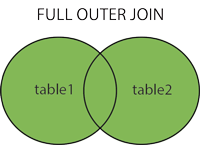

Kita akan melakukan Outer Join Tabel, mengapa demikian? karena tidak semua nama universitas pada tabel 1 ada pada tabel 2, sehingga kita melakukan Outer Join. Konsekuensinya adanya nilai NaN, untuk mencari `Average_Score` nilai NaN tidak dihandle karena tidak akan dimasukan dalam perhitungan rata-rata. Nilai NaN akan dihandle setelah mendapat `Average_Score`. Berikut adalah langkah-langkah yang dilakukan pada proses ini :

1. Join Tabel
2. Country pada tabel 1 dan 2 saling melengkapi
3. Menghapus Kolom yang tidak diperlukan (Country_THE, Country_qsworld) karena sudah dibuatkan kolom baru yaitu `Country`
4. Menghitung Average_Scoring dan menambahkan kolom World_Rank, Continent_Rank, dan National_Rank
5. Menambahkan kolom Continent dari kolom Country menggunakan pycountry-convert
6. Menghandle NaN dengan mereplacenya dengan angka 0
7. Membuat kolom Continent_Rank dan National_Rank yang menunjukan ranking universitas tersebut pada wilayah dan negara

In [21]:
#Join Tabel
df_join = pd.merge(df_THE_fix,df_qsworld_fix,on='University',how='outer')

In [22]:
df_join

,University,Teaching,Research,Citations,Industry Income,International Outlook,Country_THE,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Citations per Faculty,Academic Reputation,Employer Reputation,Country_qsworld
0,University of Oxford,91.3,99.6,98.0,68.7,96.4,United Kingdom,98.3,99.4,100.0,81.3,100.0,100.0,United Kingdom
1,Stanford University,92.2,96.7,99.9,90.1,79.5,United States,63.6,99.7,100.0,98.1,100.0,100.0,United States
2,Harvard University,94.4,98.8,99.4,46.8,77.7,United States,69.9,85.2,98.6,99.1,100.0,100.0,United States
3,California Institute of Technology,92.5,96.9,97.0,92.7,83.6,United States,88.2,100.0,100.0,99.9,97.0,82.8,United States
4,Massachusetts Institute of Technology,90.7,94.4,99.7,90.4,90.0,United States,91.9,100.0,100.0,99.1,100.0,100.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,Université de Technologie de Compiègne,NaN,NaN,NaN,NaN,NaN,NaN,32.1,0.0,38.3,22.5,0.0,18.0,France
2011,"University of California, San Francisco",NaN,NaN,NaN,NaN,NaN,NaN,0.0,44.3,100.0,48.7,42.2,0.0,United States
2012,University of the Arts London,NaN,NaN,NaN,NaN,NaN,NaN,100.0,48.3,0.0,0.0,0.0,0.0,United Kingdom
2013,Weizmann Institute of Science,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100.0,76.4,19.9,0.0,Israel


In [23]:
#Mereplace NaN menjadi 0
df_join.Country_qsworld = df_join.Country_qsworld.replace(np.nan,0)
df_join.Country_THE = df_join.Country_THE.replace(np.nan,0)

In [24]:
country = []
for i in range(df_join.shape[0]) :
  if df_join.Country_THE[i] == 0 :
    x =  df_join.Country_qsworld[i]
  else:
    x=df_join.Country_THE[i]
  country.append(x)

df_join["Country"] = np.array(country)

In [25]:
#Menghapus Kolom yang tidak diperlukan
df_join=df_join.drop(columns = ["Country_qsworld","Country_THE"])

In [26]:
#Menghitung Average Score
df_join["Average_Score"]=df_join.mean(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [27]:
#Melakukan Sorting Kemudian Memberi kolom baru bernama World Rank
df_join_sorted = df_join.sort_values("Average_Score",ascending=False)
df_join_sorted = df_join_sorted.reset_index()
df_join_sorted["World_Rank"] = df_join_sorted.index + 1
df_join_sorted = df_join_sorted.drop(columns="index")

In [28]:
#Menambahka Kolom Benua dengan pycountry-convert

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}


continent=[]
for x in df_join_sorted.Country :
  try:
    country_code = pc.country_name_to_country_alpha2(x, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    continent.append(continent_name)
  except :
    continent_name=0
    continent.append(continent_name)

df_join_sorted["Continent"] = continent
df_join_sorted["Continent"] = df_join_sorted["Continent"].replace(continents)

In [29]:
#Menghapus nilai yang hilang
df_join_sorted = df_join_sorted.drop(df_join_sorted[df_join_sorted.Continent == 0].index)

In [30]:
missing_percentage(df_join_sorted)

,Total,Percent
International Students Ratio,869,43.45
International Faculty Ratio,869,43.45
Faculty Student Ratio,869,43.45
Citations per Faculty,869,43.45
Academic Reputation,869,43.45
Employer Reputation,869,43.45
Teaching,474,23.70
Research,474,23.70
Citations,474,23.70
Industry Income,474,23.70


In [31]:
#Mereplace NaN dengan angka 0

df_join_sorted = df_join_sorted.replace(np.nan,0)
missing_percentage(df_join_sorted)

,Total,Percent
University,0,0.0
Teaching,0,0.0
Research,0,0.0
Citations,0,0.0
Industry Income,0,0.0
International Outlook,0,0.0
International Students Ratio,0,0.0
International Faculty Ratio,0,0.0
Faculty Student Ratio,0,0.0
Citations per Faculty,0,0.0


In [32]:
#Membuat kolom Continent_Rank dan National_Rank
df_join_sorted = df_join_sorted.reset_index()
df_join_sorted = df_join_sorted.drop(columns = "index")

df1 = df_join_sorted.groupby('Continent')
df2 = df_join_sorted.groupby('Country')

df_join_sorted["Continent_Rank"] = df_join_sorted["University"]
df_join_sorted["National_Rank"] = df_join_sorted["University"]

for x in df_join_sorted.Continent.unique() :
  df_temp = df1.get_group(x)
  df_temp = df_temp.reset_index()
  df_temp["Continent_rank"] = df_temp.index + 1
  temp_dict = pd.Series(df_temp.Continent_rank.values,index=df_temp.University).to_dict()
  df_join_sorted["Continent_Rank"] = df_join_sorted["Continent_Rank"].replace(temp_dict)

for x in df_join_sorted.Country.unique() :
  df_temp = df2.get_group(x)
  df_temp = df_temp.reset_index()
  df_temp["Continent_rank"] = df_temp.index + 1
  temp_dict = pd.Series(df_temp.Continent_rank.values,index=df_temp.University).to_dict()
  df_join_sorted["National_Rank"] = df_join_sorted["National_Rank"].replace(temp_dict)

**Kita sudah mempunyai dataset bernama `df_join_sorted` yang siap untuk dianalisis**

## Exploratory Data Analysis

Pada tahap ini kita akan melakukan Exploratory Data Analysis, berikut adalah hal-hal yang akan divisualisasikan :

1. Pie chart banyaknya universitas setiap data set
2. Count universitas setiap negara (Top 10)
3. Count universitas setiap continent
4. Top 10 university in world
5. Top 10 university in asia
6. Top 10 university in indonesia with keterangan ranking dunia sama ranking asia
7. Average_Score by continent 
8. Average_Score by country + GeoHeatMap
9. Correlation to Average_Score
10. Top 10 University in ASEAN
11. Distribusi Average Score

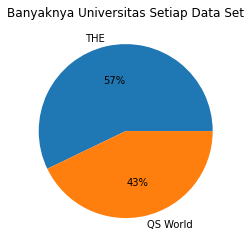

In [33]:
#1. Pie chart banyaknya universitas setiap data set
n1 = df_THE.shape[0]
n2 = df_qsworld.shape[0]
x=["THE", "QS World"]
y = [n1,n2]

plt.pie(y, labels = x, autopct='%.0f%%')
plt.title("Banyaknya Universitas Setiap Data Set")
plt.show()

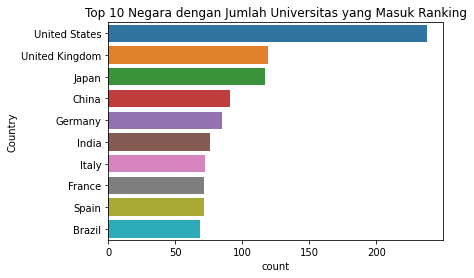

In [34]:
#2. Count universitas setiap negara (Top 10)
sns.countplot(y ='Country', data = df_join_sorted,order = df_join_sorted["Country"].value_counts().iloc[:10].index)

plt.title("Top 10 Negara dengan Jumlah Universitas yang Masuk Ranking")
# Show the plot
plt.show()

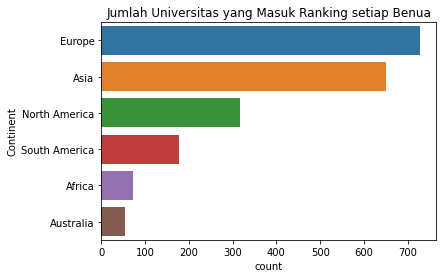

In [35]:
#3. Count universitas setiap continent (Top 10)
sns.countplot(y ='Continent', data = df_join_sorted,order = df_join_sorted["Continent"].value_counts().iloc[:].index)

plt.title("Jumlah Universitas yang Masuk Ranking setiap Benua")
# Show the plot
plt.show()

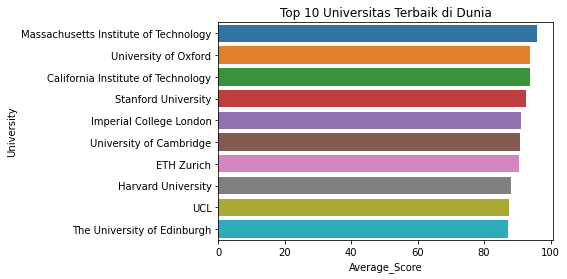

In [36]:
#4. Top 10 university in world
sns.barplot(x=df_join_sorted["Average_Score"].iloc[:10],y =df_join_sorted['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di Dunia")
# Show the plot
plt.show()

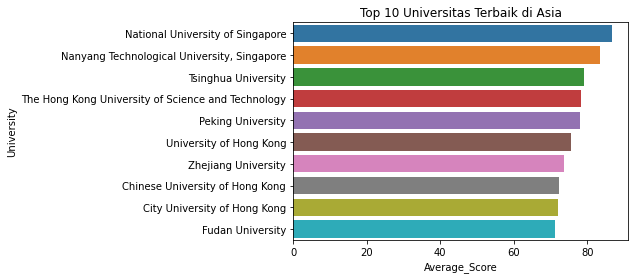

In [37]:
#5. Top 10 university in Asia
df_asia = df_join_sorted[df_join_sorted.Continent=="Asia"].sort_values("Average_Score",ascending=False)

sns.barplot(x=df_asia["Average_Score"].iloc[:10],y =df_asia['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di Asia")
# Show the plot
plt.show()

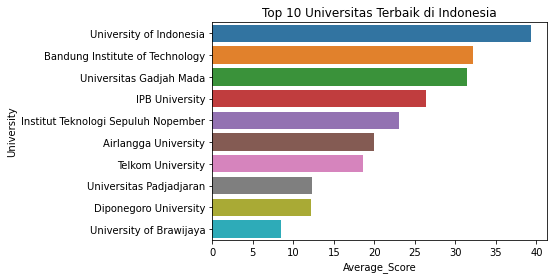

In [38]:
#6. Top 10 university in Indonesia

df_indonesia = df_join_sorted[df_join_sorted.Country=="Indonesia"].sort_values("Average_Score",ascending=False)
sns.barplot(x=df_indonesia["Average_Score"].iloc[:10],y =df_indonesia['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di Indonesia")
# Show the plot
plt.show()

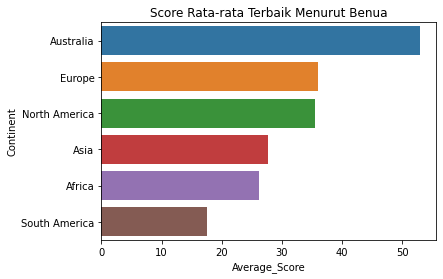

In [39]:
#7. Average_Score by Continent

df_continent_score = df_join_sorted.groupby("Continent")["Average_Score"].mean()
df_continent_score = df_continent_score.reset_index()
df_continent_score = df_continent_score.sort_values("Average_Score", ascending=False)

sns.barplot(x=df_continent_score["Average_Score"],y = df_continent_score['Continent'])


plt.title("Score Rata-rata Terbaik Menurut Benua")
# Show the plot
plt.show()

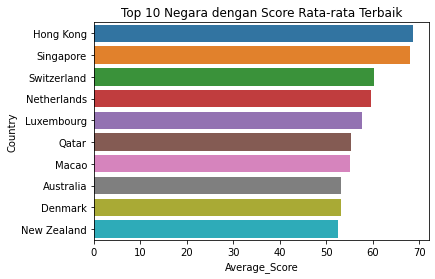

In [40]:
#8. Average_Score by Country

df_country_score = df_join_sorted.groupby("Country")["Average_Score"].mean()
df_country_score = df_country_score.reset_index()
df_country_score = df_country_score.sort_values("Average_Score", ascending=False)

sns.barplot(x=df_country_score["Average_Score"].iloc[:10],y =df_country_score['Country'].iloc[:10])


plt.title("Top 10 Negara dengan Score Rata-rata Terbaik")
# Show the plot
plt.show()

In [41]:
country_iso=[]
for x in df_country_score.Country :
  try:
    country_code = pc.country_name_to_country_alpha3(x, cn_name_format="default")
    country_iso.append(country_code)
  except :
    continue
df_country_score["Country_code"] = np.array(country_iso)

In [42]:
import plotly.express as px

fig = px.choropleth(df_country_score, locations="Country_code",
                    color="Average_Score", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Score Berdasarkan Letak Negara')

fig.show()

In [43]:
#9. Correlation numeric column to Average_Score
column_corr = df_join_sorted.drop(columns=["World_Rank","Continent_Rank","National_Rank"])
Corr = pd.DataFrame((abs(column_corr.corr()['Average_Score']).sort_values(ascending = False)))
Corr = Corr.reset_index()
Corr = Corr.drop(Corr[Corr.Average_Score == 1].index)
#Mengubah Nama Kolom
Corr = Corr.rename({'Average_Score': 'Correlation_Score'}, axis=1)
Corr

,index,Correlation_Score
1,Research,0.726138
2,Teaching,0.653811
3,Citations,0.648776
4,International Outlook,0.630158
5,Academic Reputation,0.560470
6,Employer Reputation,0.507195
7,International Faculty Ratio,0.506008
8,Industry Income,0.492601
9,International Students Ratio,0.488967
10,Citations per Faculty,0.460453


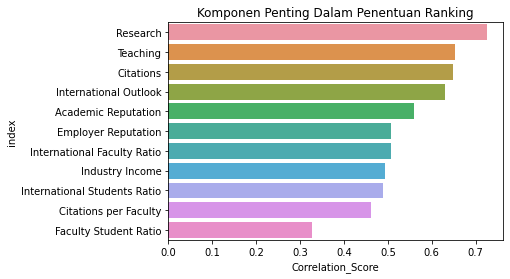

In [44]:
sns.barplot(x=Corr["Correlation_Score"],y = Corr['index'])
plt.title("Komponen Penting Dalam Penentuan Ranking")
# Show the plot
plt.show()

In [45]:
df_join_sorted[df_join_sorted.Continent == "Asia"].Country.unique()

array(['Singapore', 'China', 'Hong Kong', 'Japan', 'Malaysia',
       'Saudi Arabia', 'South Korea', 'Taiwan', 'Macao',
       'United Arab Emirates', 'Qatar', 'Lebanon', 'Israel', 'Turkey',
       'Brunei Darussalam', 'Cyprus', 'Kazakhstan', 'Jordan', 'Iran',
       'India', 'Indonesia', 'Pakistan', 'Brunei', 'Oman',
       'Northern Cyprus', 'Thailand', 'Philippines', 'Nepal', 'Bahrain',
       'Vietnam', 'Iraq', 'Georgia', 'Kuwait', 'Sri Lanka', 'Bangladesh',
       'Azerbaijan', 'Syrian Arab Republic'], dtype=object)

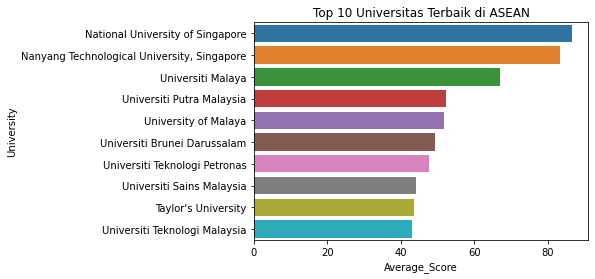

In [46]:
# Top 10 Universitas Terbaik di ASEAN
asean = ['Indonesia', 'Malaysia', 'Brunei Darussalam', 'Thailand', 'Philipphines', 'Vietnam', 'Singapore']
df_asean = df_join_sorted[df_join_sorted.Country.isin(asean)]

df_asean_best = df_asean.sort_values("Average_Score",ascending=False)
sns.barplot(x=df_asean_best["Average_Score"].iloc[:10],y = df_asean['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di ASEAN")
# Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



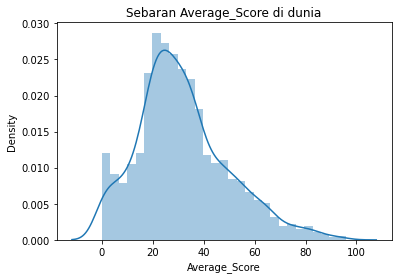

In [47]:
#11. Distribusi Average_Score
sns.distplot(df_join_sorted.Average_Score)
plt.title("Sebaran Average_Score di dunia")
plt.show()

In [48]:
df_join_sorted["Average_Score"].describe()

count    2000.000000
mean       31.676581
std        17.916977
min         0.000000
25%        19.947500
50%        29.117424
75%        41.325000
max        96.018182
Name: Average_Score, dtype: float64

## Kesimpulan

* Pada proyek ini digunakan ELT (Extract, Load, dan Transform) data pipeline model. Data disimpan di data lake dalam bentuk raw data (belum ditransformasikan). Sehingga data disimpan dalam bentuk schema yang belum didefinisikan, memungkinkan load data yang lebih cepat.

* Top 3 universitas di dunia :
Massachusetts Institute of Technology (MIT),
University of Oxford,
California Institute of Technology (Caltech)

* Top 3 universitas di Asia :
National University of Singapore (NUS),
Nanyang Technological University, Singapore (NTU)
Tsinghua University,

* Top 3 universitas di Indonesia :
University of Indonesia,
Bandung Institute of Technology (ITB),
Universitas Gadjah Mada

* Skor rata-rata terbaik
Benua Australia memiliki skor rerata yang tertinggi (>50 poin) dibandingkan benua lainnya. Disusul oleh benua Eropa (~ 35 poin) dan Amerika Utara (~ 35 poin)
Hongkong merupakan negara dengan skor rerata universitas tertinggi di dunia (~ 69 poin), disusul oleh Singapura (~ 68 poin) dan Switzerland (~60 poin)

* Komponen penilaian terpenting yang menentukan ranking dari universitas yaitu :
Research,
Teaching,
Citations



## Saran

Agar memperbaiki hasil re-scoring, akan lebih baik jika menggunakan weighted scoring. Weighted scoring dapat dilihat pada situs Times Higher Education maupun QS World Ranking.